## Initial Set Up

In [1]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#improt data

data = pd.read_csv('airline-passenger-traffic+(1).csv', header=None)
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'], format="%Y-%m")
data = data.set_index('Month')
data.head(12)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


### TIme series analysis

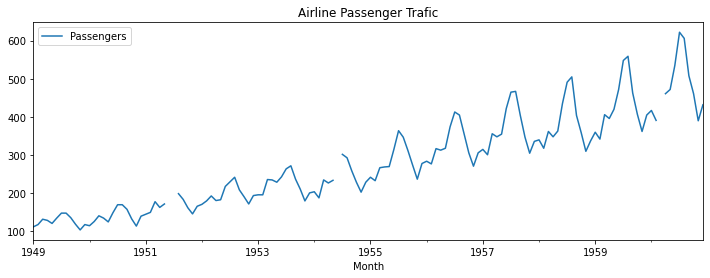

In [3]:
#plot the data

data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Airline Passenger Trafic")
plt.show()

- number of passengers each month over 12 years - 144 months
- trend is positive - increase year over year
- seasonality noticed 
- missing data in a few years - must impute these values

## Missing value handing

- mean imputation - replace each missing value by that average
 - this method does not take into account the temporal nature of time series data - it ignores the trend
 
- last observation carry forward  - looks at the missing and looks at the previous timestamp where we had data and take it forward to the next missing value
 - if feb has a value and march does not, we copy the february value and take it forward to march
 - this is a naive method but it keeps the trend
 
- linear interpolation - everytime there is a missing value we look at the point available before and after and draw a straight line between them
 - if march is empty, we look at feb and april and take their average  as the value for march
 - this captures trend but does not capture seasonality
 
- seasonal linear interpolation - This method is best applicable for the data with trend and seasonality
 - if march is missing in year x, then we take the value for march the year before and the year after and find their average. 
 - this allows us to capture seasonality since we use values for the same temporal period of different years for example
 - both trend and seasonality are accounted for in this method
 
- 

#### Mean Imputation

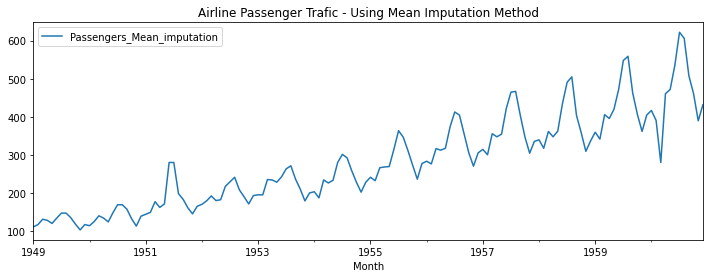

In [5]:
data = data.assign(Passengers_Mean_imputation = data.Passengers.fillna(data.Passengers.mean()))
data['Passengers_Mean_imputation'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Airline Passenger Trafic - Using Mean Imputation Method")
plt.show()

We replaced all missing values with the mean which gives up a high value in 1951 which is too high and in 1960 the value is too low

#### Linear Interpolation

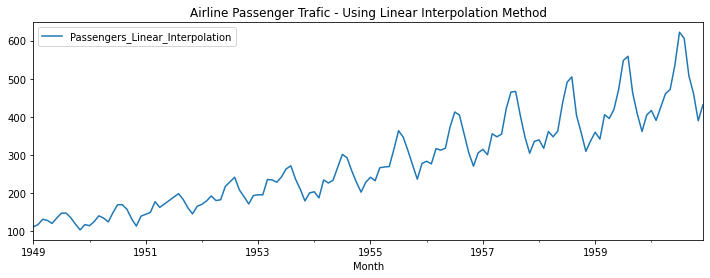

In [6]:
data = data.assign(Passengers_Linear_Interpolation = data.Passengers.interpolate(method='linear'))
data['Passengers_Linear_Interpolation'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Airline Passenger Trafic - Using Linear Interpolation Method")
plt.show()

 looks like a better fit as the values now seem in line with the data.

In [7]:
#replace passenger data with interpolation data

data['Passengers'] = data['Passengers_Linear_Interpolation']

### Questions for Met rail dataset



In [10]:
#load dataset

rail = pd.read_csv('Metrail+dataset.csv')
rail['Month'] = pd.to_datetime(rail['Month'], format="%b-%y")
rail = rail.set_index('Month')
rail.head(12)

,Travellers('000)
Month,
1991-01-01,1724.0
1991-02-01,1638.0
1991-03-01,1987.0
1991-04-01,1825.0
1991-05-01,NaN
1991-06-01,1879.0
1991-07-01,1957.0
1991-08-01,2027.0
1991-09-01,1609.0


Last observed
Write the code to impute missing value with the last value observed.

What is the mean of the column Travellers when the missing values are replaced with the last value observed value?

In [12]:
rail = rail.assign(Last_obersved_Travellers = rail["Travellers('000)"].fillna(method='ffill'))
rail.head()

,Travellers('000),Last_obersved_Travellers
Month,,
1991-01-01,1724.0,1724.0
1991-02-01,1638.0,1638.0
1991-03-01,1987.0,1987.0
1991-04-01,1825.0,1825.0
1991-05-01,NaN,1825.0


In [13]:
rail['Last_obersved_Travellers'].mean()

1838.685534591195

Next observed
Write the code to impute missing values with the next value observed.

What is the mean of the column Travellers when the missing values are replaced with the next value observed?

In [15]:
rail = rail.assign(Next_obersved_Travellers = rail["Travellers('000)"].fillna(method='backfill'))
rail.head(6)

,Travellers('000),Last_obersved_Travellers,Next_obersved_Travellers
Month,,,
1991-01-01,1724.0,1724.0,1724.0
1991-02-01,1638.0,1638.0,1638.0
1991-03-01,1987.0,1987.0,1987.0
1991-04-01,1825.0,1825.0,1825.0
1991-05-01,NaN,1825.0,1879.0
1991-06-01,1879.0,1879.0,1879.0


In [16]:
rail['Next_obersved_Travellers'].mean()

1834.446540880503

Linear interpolation
Write the code to impute missing values with the values obtained from Linear Interpolation method.

What is the mean of the column Travellers when the missing values are replaced with the values obtained from Linear Interpolation method?
 

In [18]:
rail = rail.assign(Travellers_Linear_Interpolation = rail["Travellers('000)"].interpolate(method='linear'))
rail.head(6)

,Travellers('000),Last_obersved_Travellers,Next_obersved_Travellers,Travellers_Linear_Interpolation
Month,,,,
1991-01-01,1724.0,1724.0,1724.0,1724.0
1991-02-01,1638.0,1638.0,1638.0,1638.0
1991-03-01,1987.0,1987.0,1987.0,1987.0
1991-04-01,1825.0,1825.0,1825.0,1825.0
1991-05-01,NaN,1825.0,1879.0,1852.0
1991-06-01,1879.0,1879.0,1879.0,1879.0


In [19]:
rail['Travellers_Linear_Interpolation'].mean()

1836.566037735849

## Outlier Handling In Time Series

## Detection
- Extreme Value Method - if the data follows a guassian then we can use a method to reject the bottom and top 1%
 - this method causes us to lose variance. If there is a day with huge values annually, like black friday, we lose data for forecasting that day


- IQR method - we can use simple outlier detection here Q1 - 1.5*IQR and Q3 + 1.5*IQR


- Histogram method - simplest method
 - we can see the distribution of the values and those observersations that  have very low frequency but very high value would be outliers

## Treatment 

- Replace is mean/median/mode 
 - this reduces the variance of the entire series and it is not right to replace a high demand day with an average
 
- trimming - removing the record from the data
 - won't work in all time series esp if continous data is needed. Trimming makes data discontinuous
 
- Capping - lower and upper capping of values
 - if values lie outside of this band then we replace that value with the cap value. 
 - if the range is 10-100 and a value is 0 and another 110, we replace them with 10 and 100 respectively. 
 - zero capping is also used, if there are negative values then replace with zero for example a bank account being -50, it should be 0 since an account can not be negative in most cases

### Boxplot and IQR method

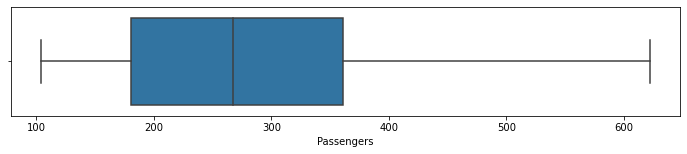

In [21]:
fig = plt.subplots(figsize=(12,2))

ax = sns.boxplot(x = data['Passengers'], whis=1.5)

whis paramters sets the length of the whiskers to be 1.5*IQR

above there are not outliers visible with a 1.5 Whis

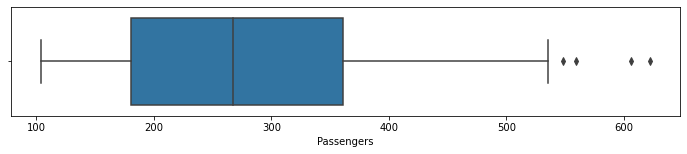

In [22]:
#whis = 1

fig = plt.subplots(figsize=(12,2))

ax = sns.boxplot(x = data['Passengers'], whis=1)

we get 4 outliers now

if you take a look at the time series plot you'll see these outliers shown are actually just the four peak months near the end when passengers numbers increased a lot. remember the trend is positive and time increases so higher values near the end are normal. if the outliers were earlier in the series then it may have been a problem 

### Histogram method

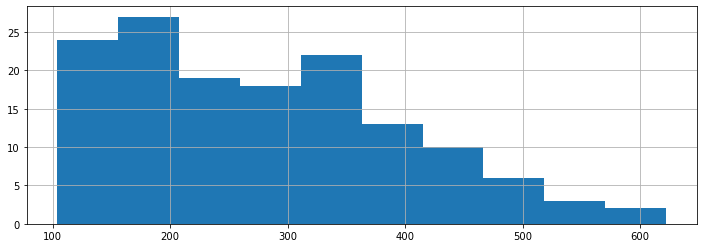

In [23]:
fig = data['Passengers'].hist(figsize=(12,4))

The were no discontinous values seen here, the data decreases gradually in frequency. There are no outliers in this data

## Time Series Decomposition

There are two methods of decomposition

- Additive 
- Multiplicative

### Additive Decomposition

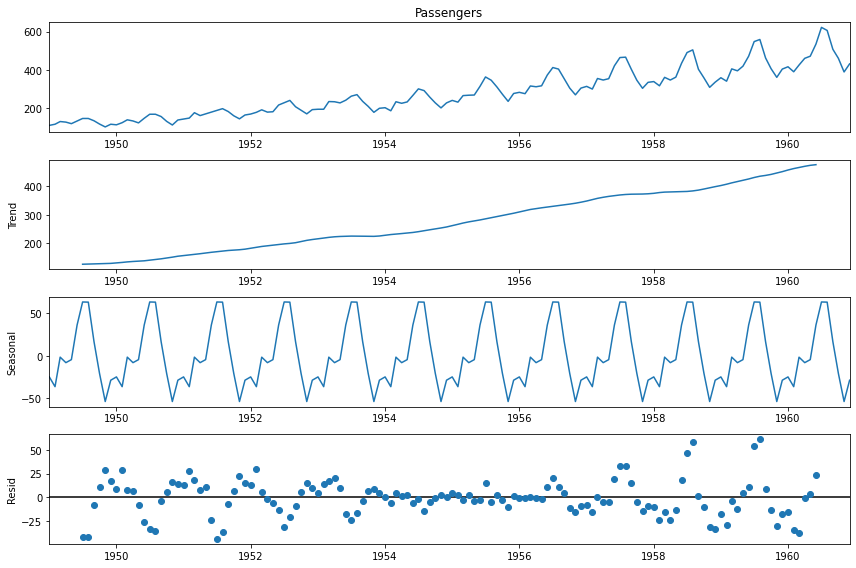

In [24]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 12,8

#in sm there is a module tsa (time series analysis) and a function seasonal_decompose
additive_decomposition =  sm.tsa.seasonal_decompose(data.Passengers, model='additive')
fig = additive_decomposition.plot()
plt.show()

the first graph is the OG series and then broke it into 3 components Trend, Seasonal and residual

- Trend - captures the overall behaviour of the data i.e increasing or decreasing
- Seasonal captures the absolutemovement within a year that moved up or down.
 - it tells you how much to add or subtract to the trend average for that year to to get the estimated value. 

- residuals captures what is left - there is some seasonality here so additive may not be the best since there should be no pattern to residuals 

### Multiplicative Decomposition

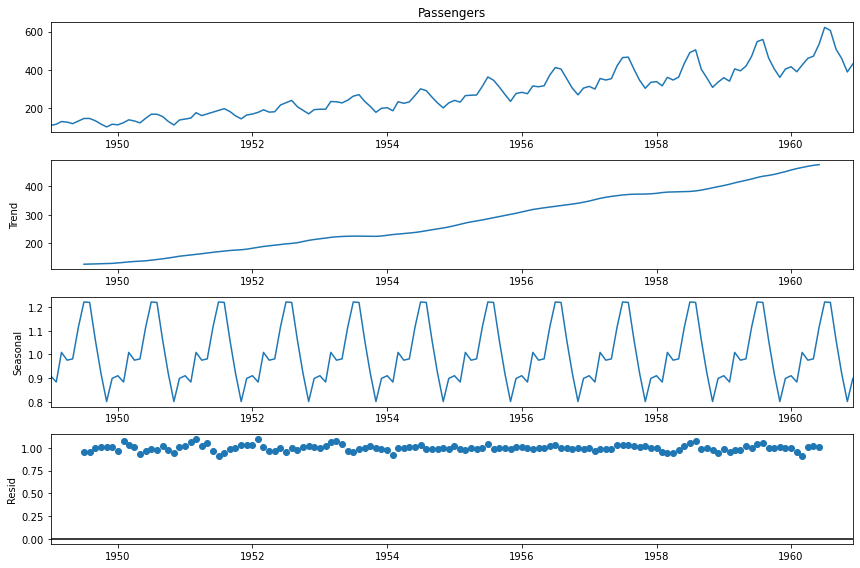

In [25]:
rcParams['figure.figsize'] = 12,8

#in sm there is a module tsa (time series analysis) and a function seasonal_decompose
mul_decomposition =  sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative')
fig = mul_decomposition.plot()
plt.show()

- Trend - increasing over time
- Seasonal - it is a multiplicative factor so it would be multiplicative value times the average for the year. 
 - e.g year = 1890 and trend average = 200 and in march the seasonal multiplicative factor was 1.2 so we would multiple 200*1.2 to get the value estimate for that month of that year
 
- residuals as a relative straight line, the seasonality is more removed here than in the additive method